## Benchmarking GPT2 with FHE
Benchmarking the performance of the GPT2 model when a single attention head is calculated under FHE.

In [1]:
!pip install -U pip wheel setuptools
!pip install concrete-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 22.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of onnxconverter-common to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of pydantic to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.6/

In [1]:
!git clone https://github.com/zama-ai/concrete-ml.git

fatal: destination path 'concrete-ml' already exists and is not an empty directory.


In [4]:
!pip install transformers

In [3]:
import os
# Get current directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

files = os.listdir(current_directory)
print("Files in Current Directory:", files)

os.chdir('concrete-ml/use_case_examples/llm')

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /content
Files in Current Directory: ['.config', 'concrete-ml', 'sample_data']
Current Directory: /content/concrete-ml/use_case_examples/llm


In [2]:
from concrete.ml.sklearn import LinearRegression as conLinearRegression
from sklearn.linear_model import LinearRegression

import numpy as np

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


### Unencrypted model from *HuggingFace*

In [5]:
import logging

import matplotlib.pyplot as plt
import torch
from load_huggingface import get_gpt2_model, get_gpt2_tokenizer
from qgpt2_models import MultiHeadsQGPT2Model, SingleHeadQGPT2Model

In [6]:
gpt2_model = get_gpt2_model("gpt2_model")
gpt2_tokenizer = get_gpt2_tokenizer("gpt2_tokenizer")

In [6]:
input_sentence = "Computations on encrypted data can help"

In [7]:
input_token_indexes = gpt2_tokenizer.encode(input_sentence)
input_ids = torch.tensor(input_token_indexes).unsqueeze(0)

print(input_token_indexes)
print(input_ids)
gpt2_tokenizer(input_sentence)

[5377, 1996, 602, 319, 19365, 1366, 460, 1037]
tensor([[ 5377,  1996,   602,   319, 19365,  1366,   460,  1037]])


{'input_ids': [5377, 1996, 602, 319, 19365, 1366, 460, 1037], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [8]:
# Generate new tokens an get the following sentence
output_ids = gpt2_model.generate(input_ids, max_new_tokens=4, use_cache=False)
gpt2_tokenizer.decode(output_ids[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Computations on encrypted data can help protect your privacy.'

### Timing the execution, simulation, and disable modes for Single Attention Head Encrypted Model

In [9]:
proj_single_head_qgpt2 = SingleHeadQGPT2Model.from_pretrained(
    "gpt2_model", n_bits=2, use_cache=False
)

Some weights of SingleHeadQGPT2Model were not initialized from the model checkpoint at gpt2_model and are newly initialized: ['transformer.h.0.attn.c_attn_1_11.bias', 'transformer.h.0.attn.c_attn_1_11.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
import time

# Initialize total time for each mode
total_times = {'simulate': 0, 'disable': 0, 'execute': 0}





In [12]:
proj_single_head_qgpt2.set_fhe_mode(fhe="disable")
for i in range(1):
    print(i)
    start_time = time.process_time()
    output_logits_simulated = proj_single_head_qgpt2(input_ids).logits
    end_time = time.process_time()
    total_times['disable'] += (end_time - start_time)

    print(total_times['disable'])


0
0.3293991760000008


In [15]:
circuit_single_head = proj_single_head_qgpt2.compile(input_ids)
# Run the loop 10 times for each mode


proj_single_head_qgpt2.set_fhe_mode(fhe="simulate")
for i in range(1):
    print(i)
    start_time = time.process_time()
    output_logits_simulated = proj_single_head_qgpt2(input_ids).logits
    end_time = time.process_time()
    total_times['simulate'] += (end_time - start_time)

    print("simulate")
    print(total_times['simulate'])




Circuit compiled with at most 4 bits
0
simulate
0.4582041060000037


In [13]:
circuit_single_head = proj_single_head_qgpt2.compile(input_ids)
# Run the loop 10 times for each mode

proj_single_head_qgpt2.set_fhe_mode(fhe="execute")
for i in range(1):
    print(i)
    start_time = time.process_time()
    output_logits_simulated = proj_single_head_qgpt2(input_ids).logits
    end_time = time.process_time()
    total_times['execute'] += (end_time - start_time)
    print(total_times['execute'])



Circuit compiled with at most 4 bits
0
28.117137912000004


In [16]:
# Calculate the average time taken for each mode
average_times = {mode: total_time / 1 for mode, total_time in total_times.items()}

print("Average time per mode:")
for mode, avg_time in average_times.items():
    print(f"{mode}: {avg_time}")

Average time per mode:
simulate: 0.4582041060000037
disable: 0.3293991760000008
execute: 28.117137912000004


### Top-k Accuracy and Timing

Some weights of SingleHeadQGPT2Model were not initialized from the model checkpoint at gpt2_model and are newly initialized: ['transformer.h.0.attn.c_attn_1_11.bias', 'transformer.h.0.attn.c_attn_1_11.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Circuit compiled with at most 4 bits
In a world where technology reigns supreme, humans struggle to find their place. Amidst the rapid advancements and reliance on artificial intelligence, individuals yearn for a deeper connection to nature and their own humanity,
Model: SingleHeadQGPT2Model, n_bits: 1, Average Top-1 Accuracy: 1.0000


Some weights of SingleHeadQGPT2Model were not initialized from the model checkpoint at gpt2_model and are newly initialized: ['transformer.h.0.attn.c_attn_1_11.bias', 'transformer.h.0.attn.c_attn_1_11.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Circuit compiled with at most 4 bits
In a world where technology reigns supreme, humans struggle to find their place. Amidst the rapid advancements and reliance on artificial intelligence, individuals yearn for a deeper connection to nature and their own humanity,
Model: SingleHeadQGPT2Model, n_bits: 2, Average Top-1 Accuracy: 1.0000


Some weights of SingleHeadQGPT2Model were not initialized from the model checkpoint at gpt2_model and are newly initialized: ['transformer.h.0.attn.c_attn_1_11.bias', 'transformer.h.0.attn.c_attn_1_11.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Circuit compiled with at most 6 bits
In a world where technology reigns supreme, humans struggle to find their place. Amidst the rapid advancements and reliance on artificial intelligence, individuals yearn for a deeper connection to nature and their own humanity,
Model: SingleHeadQGPT2Model, n_bits: 3, Average Top-1 Accuracy: 1.0000


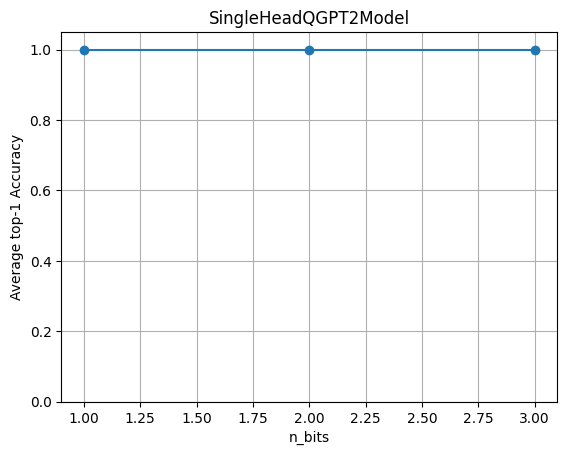

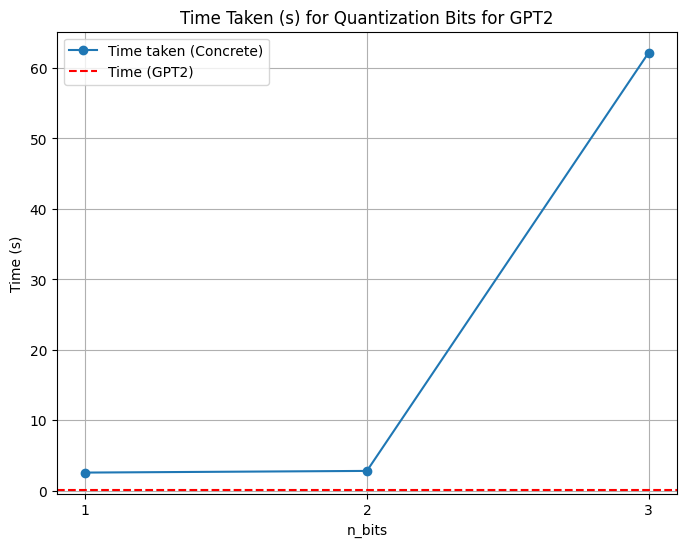

In [6]:
%matplotlib inline
import time

def generate_topk_tokens(model, tokenizer, text, top_k):
    """Generate the top-k tokens for every token in the text."""
    inputs = tokenizer.encode(text, return_tensors="pt")[:, :8]
    topk_tokens_list = []
    with torch.no_grad():
        outputs = model(inputs)
        logits = outputs.logits
        for logit in logits[0]:
            topk_tokens = torch.topk(
                logit,
                top_k,
            ).indices.tolist()
            topk_tokens_list.append(topk_tokens)
    return topk_tokens_list


def calculate_topk_accuracy(ground_truth_tokens, computed_tokens):
    """Calculate the top-k accuracy."""
    correct_count = sum([1 for gt_token in ground_truth_tokens if gt_token in computed_tokens])
    return correct_count / len(ground_truth_tokens)


# Define the models to evaluate
models = {
    "SingleHeadQGPT2Model": SingleHeadQGPT2Model
}

# Define the different number of bits and k values to evaluate
n_bits_range = [1,2,3]
top_ks = [1]

# Define the text data to use for the evaluation
dataset_file = "data.txt"

# Train model2 (constant model)
# model2 = LinearRegression()
# model2.fit(X_train, y_train)
# t1 = time.process_time()
# y_pred_clear = model2.predict(X_test)
# t2 = time.process_time()
# time_taken_og = t2 - t1
# print(time_taken_og)

# Read the evaluation file
with open(dataset_file, "r", encoding="utf-8") as file:
    input_texts = [line.strip() for line in file][:1]

for model_name, Model in models.items():
    plt.figure()
    for top_k in top_ks:
        accuracies = []
        time_clear=[]
        time_enc=[]
        for n_bits in n_bits_range:

            # Load the model using the current number of bits and set it to clear quantized mode
            model = Model.from_pretrained(
                "gpt2_model",
                n_bits=n_bits,
            )

            input_token_indexes = (gpt2_tokenizer.encode(input_texts[0]))[:8]
            #torch.tensor(input_token_indexes).unsqueeze(0)
            #print(input_token_indexes.shape)
            input_ids = torch.tensor(input_token_indexes).unsqueeze(0)


            model.compile(input_ids)
            model.set_fhe_mode(fhe="execute")

            #model.set_fhe_mode(fhe="disable")


            accuracy_scores = []
            time_taken_clear = 0.0
            time_taken_enc = 0.0

            for text in input_texts:
                print(text)

                # input_token_indexes = (gpt2_tokenizer.encode(text))
                # #torch.tensor(input_token_indexes).unsqueeze(0)
                # #print(input_token_indexes.shape)
                # input_ids = torch.tensor(input_token_indexes).unsqueeze(0)
                # print(input_ids.shape)

                # Generate the top-k tokens for the Hugging Face floating point model
                t1 = time.process_time()
                hf_topk_tokens_list = generate_topk_tokens(gpt2_model, gpt2_tokenizer, text, 1)

                t2 = time.process_time()

                time_taken_clear +=  t2 - t1

                # Generate the top-k tokens for the clone model
                t1 = time.process_time()
                clone_topk_tokens_list = generate_topk_tokens(model, gpt2_tokenizer, text, top_k)

                t2 = time.process_time()

                time_taken_enc +=  t2 - t1


                # Compute the top-k accuracy for each token in the text
                for hf_topk_tokens, clone_topk_tokens in zip(
                    hf_topk_tokens_list, clone_topk_tokens_list
                ):
                    topk_accuracy = calculate_topk_accuracy(hf_topk_tokens, clone_topk_tokens)
                    accuracy_scores.append(topk_accuracy)

            # Compute the average accuracy within the text
            average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
            accuracies.append(average_accuracy)

            time_clear.append(time_taken_clear/10)
            time_enc.append(time_taken_enc/10)



            # Print the average accuracy for this model, n_bits, and top_k
            print(
                f"Model: {model_name}, "
                f"n_bits: {n_bits}, "
                f"Average Top-{top_k} Accuracy: {average_accuracy:.4f}"
            )
            del model

        plt.plot(n_bits_range, accuracies, label=f"Top-{top_k}", marker='o')

    # Plot the model's evaluation
    plt.title(f"{model_name}")
    plt.xlabel("n_bits")
    plt.ylabel("Average top-1 Accuracy")
    #plt.legend()
    plt.grid(True)
    plt.ylim(0, 1.05)
    # plt.axhline(y=r2_score(y_test, y_pred_clear), color='r', linestyle='--', label='R2 (LinearRegression sklearn)')

    plt.figure(figsize=(8, 6))
    plt.plot(n_bits_range, time_enc, marker='o', label='Time taken (Concrete)')
    plt.axhline(y=sum(time_clear)/len(time_clear), color='r', linestyle='--', label='Time (GPT2)')
    plt.xlabel('n_bits')
    plt.ylabel('Time (s)')
    plt.title('Time Taken (s) for Quantization Bits for GPT2')
    plt.xticks(n_bits_range)
    plt.legend()
    plt.grid(True)
    plt.show()


plt.show()

1


Some weights of SingleHeadQGPT2Model were not initialized from the model checkpoint at gpt2_model and are newly initialized: ['transformer.h.0.attn.c_attn_1_11.bias', 'transformer.h.0.attn.c_attn_1_11.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Circuit compiled with at most 4 bits
Model: SingleHeadQGPT2Model, n_bits: 1, Average Top-1 Accuracy: 0.8034
2


Some weights of SingleHeadQGPT2Model were not initialized from the model checkpoint at gpt2_model and are newly initialized: ['transformer.h.0.attn.c_attn_1_11.bias', 'transformer.h.0.attn.c_attn_1_11.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Circuit compiled with at most 4 bits
Model: SingleHeadQGPT2Model, n_bits: 2, Average Top-1 Accuracy: 0.8034
3


Some weights of SingleHeadQGPT2Model were not initialized from the model checkpoint at gpt2_model and are newly initialized: ['transformer.h.0.attn.c_attn_1_11.bias', 'transformer.h.0.attn.c_attn_1_11.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Circuit compiled with at most 6 bits
Model: SingleHeadQGPT2Model, n_bits: 3, Average Top-1 Accuracy: 0.8034
4


Some weights of SingleHeadQGPT2Model were not initialized from the model checkpoint at gpt2_model and are newly initialized: ['transformer.h.0.attn.c_attn_1_11.bias', 'transformer.h.0.attn.c_attn_1_11.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Circuit compiled with at most 8 bits
Model: SingleHeadQGPT2Model, n_bits: 4, Average Top-1 Accuracy: 0.9103
5


Some weights of SingleHeadQGPT2Model were not initialized from the model checkpoint at gpt2_model and are newly initialized: ['transformer.h.0.attn.c_attn_1_11.bias', 'transformer.h.0.attn.c_attn_1_11.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Circuit compiled with at most 11 bits
Model: SingleHeadQGPT2Model, n_bits: 5, Average Top-1 Accuracy: 0.9207
6


Some weights of SingleHeadQGPT2Model were not initialized from the model checkpoint at gpt2_model and are newly initialized: ['transformer.h.0.attn.c_attn_1_11.bias', 'transformer.h.0.attn.c_attn_1_11.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Circuit compiled with at most 13 bits
Model: SingleHeadQGPT2Model, n_bits: 6, Average Top-1 Accuracy: 0.9724


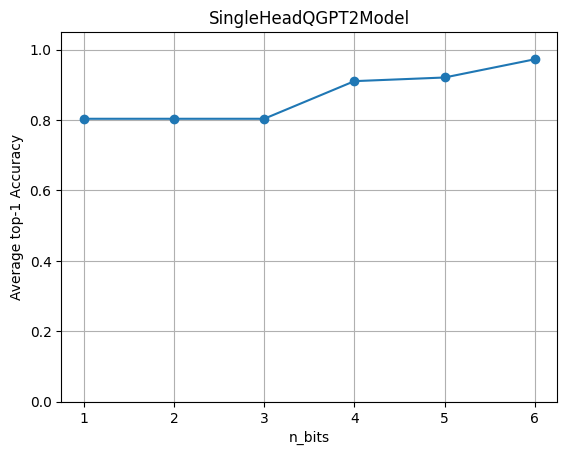

In [10]:
%matplotlib inline
import time

def generate_topk_tokens(model, tokenizer, text, top_k):
    """Generate the top-k tokens for every token in the text."""
    inputs = tokenizer.encode(text, return_tensors="pt")[:, :10]
    topk_tokens_list = []
    with torch.no_grad():
        outputs = model(inputs)
        logits = outputs.logits
        for logit in logits[0]:
            topk_tokens = torch.topk(
                logit,
                top_k,
            ).indices.tolist()
            topk_tokens_list.append(topk_tokens)
    return topk_tokens_list


def calculate_topk_accuracy(ground_truth_tokens, computed_tokens):
    """Calculate the top-k accuracy."""
    correct_count = sum([1 for gt_token in ground_truth_tokens if gt_token in computed_tokens])
    return correct_count / len(ground_truth_tokens)


# Define the models to evaluate
models = {
    "SingleHeadQGPT2Model": SingleHeadQGPT2Model
}

# Define the different number of bits and k values to evaluate
n_bits_range = [1,2,3, 4, 5,6]
top_ks = [1]

# Define the text data to use for the evaluation
dataset_file = "data.txt"

# Train model2 (constant model)
# model2 = LinearRegression()
# model2.fit(X_train, y_train)
# t1 = time.process_time()
# y_pred_clear = model2.predict(X_test)
# t2 = time.process_time()
# time_taken_og = t2 - t1
# print(time_taken_og)

# Read the evaluation file
with open(dataset_file, "r", encoding="utf-8") as file:
    input_texts = [line.strip() for line in file][50:150]

for model_name, Model in models.items():
    plt.figure()
    for top_k in top_ks:
        accuracies = []
        time_clear=[]
        time_enc=[]
        for n_bits in n_bits_range:
            print(n_bits)

            # Load the model using the current number of bits and set it to clear quantized mode
            model = Model.from_pretrained(
                "gpt2_model",
                n_bits=n_bits,
            )

            input_token_indexes = (gpt2_tokenizer.encode(input_texts[0]))[:10]
            #torch.tensor(input_token_indexes).unsqueeze(0)
            #print(input_token_indexes.shape)
            input_ids = torch.tensor(input_token_indexes).unsqueeze(0)


            model.compile(input_ids)
            model.set_fhe_mode(fhe="simulate")

            #model.set_fhe_mode(fhe="disable")


            accuracy_scores = []
            time_taken_clear = 0.0
            time_taken_enc = 0.0

            for text in input_texts:


                # input_token_indexes = (gpt2_tokenizer.encode(text))
                # #torch.tensor(input_token_indexes).unsqueeze(0)
                # #print(input_token_indexes.shape)
                # input_ids = torch.tensor(input_token_indexes).unsqueeze(0)
                # print(input_ids.shape)

                # Generate the top-k tokens for the Hugging Face floating point model
                t1 = time.process_time()
                hf_topk_tokens_list = generate_topk_tokens(gpt2_model, gpt2_tokenizer, text, 1)

                t2 = time.process_time()

                time_taken_clear +=  t2 - t1

                # Generate the top-k tokens for the clone model
                t1 = time.process_time()
                clone_topk_tokens_list = generate_topk_tokens(model, gpt2_tokenizer, text, top_k)

                t2 = time.process_time()

                time_taken_enc +=  t2 - t1


                # Compute the top-k accuracy for each token in the text
                for hf_topk_tokens, clone_topk_tokens in zip(
                    hf_topk_tokens_list, clone_topk_tokens_list
                ):
                    topk_accuracy = calculate_topk_accuracy(hf_topk_tokens, clone_topk_tokens)
                    accuracy_scores.append(topk_accuracy)

            # Compute the average accuracy within the text
            average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
            accuracies.append(average_accuracy)

            time_clear.append(time_taken_clear/10)
            time_enc.append(time_taken_enc/10)



            # Print the average accuracy for this model, n_bits, and top_k
            print(
                f"Model: {model_name}, "
                f"n_bits: {n_bits}, "
                f"Average Top-{top_k} Accuracy: {average_accuracy:.4f}"
            )
            del model

        plt.plot(n_bits_range, accuracies, label=f"Top-{top_k}", marker='o')

    # Plot the model's evaluation
    plt.title(f"{model_name}")
    plt.xlabel("n_bits")
    plt.ylabel("Average top-1 Accuracy")
    #plt.legend()
    plt.grid(True)
    plt.ylim(0, 1.05)


plt.show()